In [150]:
%autosave 60
%matplotlib inline

Autosaving every 60 seconds


In [311]:
import warnings
warnings.filterwarnings("ignore")

#Librairies for analysing the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.impute import SimpleImputer
import copy

#Libraries for modeling with sklearn
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Librairies for modeling with keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping

#library to save the model
import pickle

# Creation of a model predicting the league of a gamer

### Description of the dataset 

**Origin of the dataset** 


*-- Creators: Mark Blair, Joe Thompson, Andrew Henrey, Bill Chen 
-- Mark Blair: Department of Psychology; Simon Fraser University; Burnaby; 
8888 University Drive; mblair '@' sfu.ca) 
-- Date: September, 20, 2013*



**Information given by the creators :**


-- *We aggregated screen movements into screen-fixations using a Salvucci & Goldberg (2000) dispersion-threshold algorithm, and defined Perception Action Cycles (PACs) as fixations with at least one action.* 


-- *Time is recorded in terms of timestamps in the StarCraft 2 replay file. When the game is played on 'faster', 1 real-time second is equivalent to roughly 88.5 timestamps.*


-- *List of possible game actions is discussed in Thompson, Blair, Chen, & Henrey (2013)*

* **GameID**: Unique ID number for each game (integer) 
* **LeagueIndex**: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal) 
* **Age**: Age of each player (integer) 
* **HoursPerWeek**: Reported hours spent playing per week (integer) 
* **TotalHours**: Reported total hours spent playing (integer) 
* **APM**: Action per minute (continuous) 
* **SelectByHotkeys**: Number of unit or building selections made using hotkeys per timestamp (continuous) 
* **AssignToHotkeys**: Number of units or buildings assigned to hotkeys per timestamp (continuous) 
* **UniqueHotkeys**: Number of unique hotkeys used per timestamp (continuous) 
* **MinimapAttacks**: Number of attack actions on minimap per timestamp (continuous) 
* **MinimapRightClicks**: number of right-clicks on minimap per timestamp (continuous) 
* **NumberOfPACs**: Number of PACs per timestamp (continuous) 
* **GapBetweenPACs**: Mean duration in milliseconds between PACs (continuous) 
* **ActionLatency**: Mean latency from the onset of a PACs to their first action in milliseconds (continuous) 
* **ActionsInPAC**: Mean number of actions within each PAC (continuous) 
* **TotalMapExplored**: The number of 24x24 game coordinate grids viewed by the player per timestamp (continuous) 
* **WorkersMade**: Number of SCVs, drones, and probes trained per timestamp (continuous) 
* **UniqueUnitsMade**: Unique unites made per timestamp (continuous) 
* **ComplexUnitsMade**: Number of ghosts, infestors, and high templars trained per timestamp (continuous) 
* **ComplexAbilitiesUsed**: Abilities requiring specific targeting instructions used per timestamp (continuous)

## Analyse the data

In [312]:
dataset = pd.read_csv("SkillCraft1_Dataset.csv",sep=",",index_col=0)
print("shape : ",dataset.shape)
dataset

shape :  (3395, 19)


,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,,,,,,,,,,,,,,,,,,,
52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.000000,0.000208
56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000


<div class="alert alert-block alert-info">
    We can see that there are <strong>missing data (?)</strong>, this might be a problem for our model conceptions. Let's see how many datas are missing and treat them.
</div>

### Data Cleaning

In [274]:
dataset.dtypes

LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

<div class="alert alert-block alert-info">
    We can see that <strong>Age</strong>, <strong>HoursPerWeek</strong> and <strong>TotalHours</strong> are detected as Object but they are numeric values. Let's parse them to numeric.
</div>

In [313]:
dataset['Age'] = pd.to_numeric(dataset['Age'],errors = 'coerce')
dataset['HoursPerWeek'] = pd.to_numeric(dataset['HoursPerWeek'],errors = 'coerce')
dataset['TotalHours'] = pd.to_numeric(dataset['TotalHours'],errors = 'coerce')
#By using errors = 'coerce', we give the value NaN to the not numeric values instead of throwing an exception. 
#dataset.dtypes

<div class="alert alert-block alert-warning">
Good, now all the columns are well defined, we now want to see <strong>if there are missing datas</strong> and see how we can deal with it (Delete the columns ? The observations ? Give a default value (mean of the column) ?)
</div>

In [185]:
dataset.isnull().sum()

LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

<div class="alert alert-block alert-info">
    We can see that <strong>Age</strong> contains 55 null values, <strong>HoursPerWeek</strong> contains 56 null values and <strong>TotalHours</strong> 57 null values.
</div>

In [266]:
display(dataset[dataset['Age'].isnull()].head(3))
display(dataset[dataset['Age'].isnull()].tail(3))

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,,,,,,,,,,,,,,,,,,,
10001,8,NaN,NaN,NaN,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.0
10005,8,NaN,NaN,NaN,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.0
10006,8,NaN,NaN,NaN,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.0


,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,,,,,,,,,,,,,,,,,,,
10092,8,NaN,NaN,NaN,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
10094,8,NaN,NaN,NaN,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631
10095,8,NaN,NaN,NaN,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


<div class="alert alert-block alert-info">
    We can see that all the Professional leagues players misses their age, their total hours and their HoursPerWeek. Maybe we shouldn't delete those observations, because knowing abour professional players can be really helpfull. We might just want to change those value to their respective mean value.
</div>

<div class="alert alert-block alert-warning">
    We can see that <strong>TotalHours has a correlation with League Index of 0,024</strong> meaning that Total Hours and LeagueIndex are unrelated, <strong>we want to delete this column</strong>. On the other hand,<strong> Age and HoursPerWeek have a low correlation with League Index but still has a notable correlation </strong>. We will <strong>set the unknown Total hours and Age value respectively to the mean Total Hours and mean Age</strong>.  
</div>

<div class="alert alert-block alert-warning">
Let's see the caracteristics of this dataframe in order to detect maybe unrealistic datas before setting the missing values of Age,HoursPerWeek and TotalHours
</div>

In [203]:
dataset.describe()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3340.000000,3339.000000,3338.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4.184094,21.647904,15.910752,960.421809,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,1.517327,4.206341,11.962912,17318.133922,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


<div class="alert alert-block alert-info">
<b>Analyse:</b> <ul>
    <li>We can see that someone has been playing 168 hours/week which means he/she plays 24h/7 this seems unrealistic.</li>
     <li>We can see that someone has been playing 1 000 000 hours which means he/she played more than 100 years this is unrealistic.</li>
    <li>The rest seems coherent.</li>
</ul>
</div>

<div class="alert alert-block alert-warning">
Let's see how many observation related people playing more than 150 hours a week which is the limit acceptable (2 hours of sleep) and delete those observations.
    
</div>

In [276]:
dataset[dataset['HoursPerWeek']>150]

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,,,,,,,,,,,,,,,,,,,
2000,6,16.0,168.0,1260.0,233.3058,0.017521,0.000744,10,0.000178,0.000235,0.005137,25.5962,38.9165,5.0961,43,0.001027,10,0.000315,0.000502


<div class="alert alert-block alert-info">
<b>Analyse:</b> There is just one observation to drop.
</div>

In [314]:
dataset = dataset.drop([2000])

<div class="alert alert-block alert-warning">
Let's see how many observation related people playing more than 123 000 hours which is the limit acceptable (14 years - since the game appeared in 1999) and delete those observations.
    
</div>

In [278]:
dataset[dataset['TotalHours']>123000]

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,,,,,,,,,,,,,,,,,,,
5140,5,18.0,24.0,1000000.0,281.4246,0.023428,0.000799,5,0.000041,0.000447,0.005136,28.1164,36.1266,5.8522,29,0.001328,6,0.0,0.0


In [315]:
dataset = dataset.drop([5140])

<div class="alert alert-block alert-warning">
Now that everything seems normal, let's <strong>set the missing values to their mean value. </strong>
</div>

In [316]:
columns = dataset.columns
my_imputer = SimpleImputer()
my_imputer.fit(dataset)
dataset = pd.DataFrame(my_imputer.transform(dataset))
dataset.columns = columns
dataset

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,5.0,27.000000,10.000000,3000.000000,143.7180,0.003515,0.000220,7.0,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28.0,0.001397,6.0,0.000000,0.000000
1,5.0,23.000000,10.000000,5000.000000,129.2322,0.003304,0.000259,4.0,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22.0,0.001194,5.0,0.000000,0.000208
2,4.0,30.000000,10.000000,200.000000,69.9612,0.001101,0.000336,4.0,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22.0,0.000745,6.0,0.000000,0.000189
3,3.0,19.000000,20.000000,400.000000,107.6016,0.001034,0.000213,1.0,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19.0,0.000426,7.0,0.000000,0.000384
4,3.0,32.000000,10.000000,500.000000,122.8908,0.001136,0.000327,2.0,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15.0,0.001174,4.0,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,8.0,21.650689,15.862751,660.859712,259.6296,0.020425,0.000743,9.0,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46.0,0.000877,5.0,0.000000,0.000000
3389,8.0,21.650689,15.862751,660.859712,314.6700,0.028043,0.001157,10.0,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16.0,0.000788,4.0,0.000000,0.000000
3390,8.0,21.650689,15.862751,660.859712,299.4282,0.028341,0.000860,7.0,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19.0,0.001260,4.0,0.000000,0.000000
3391,8.0,21.650689,15.862751,660.859712,375.8664,0.036436,0.000594,5.0,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15.0,0.000613,6.0,0.000000,0.000631


<div class="alert alert-block alert-warning">
Let's check that we don't have any missing values left.
</div>

In [281]:
dataset.isnull().sum()

LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

<div class="alert alert-block alert-info">
    <b>Great</b> It seems like we can <strong>start to analyse our data :) </strong> 
</div>

## Data Analysing

<div class="alert alert-block alert-warning">
    <strong>First let's see the distribution of the different league index.</strong>
</div>

<AxesSubplot:title={'center':'Distribution of the League Index in our dataset'}, xlabel='LeagueIndex'>

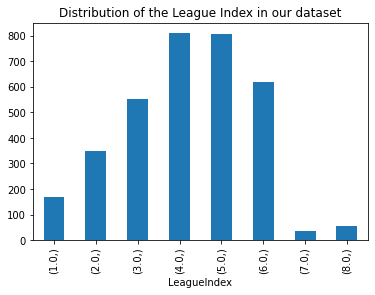

In [282]:
pd.DataFrame(dataset['LeagueIndex']).sort_values(by=['LeagueIndex']).value_counts(sort=False).plot(kind='bar',title="Distribution of the League Index in our dataset")

<div class="alert alert-block alert-info">
    <b>Analyse:</b> We can see that the <strong>leagues 7 and 8 are under represented</strong>, it might be a problem to predict well observation of their group. It seems to follow a <strong>normal distribution</strong>.
</div>

<div class="alert alert-block alert-warning">
    Now let's see the <strong>correlation matrix</strong>
</div>



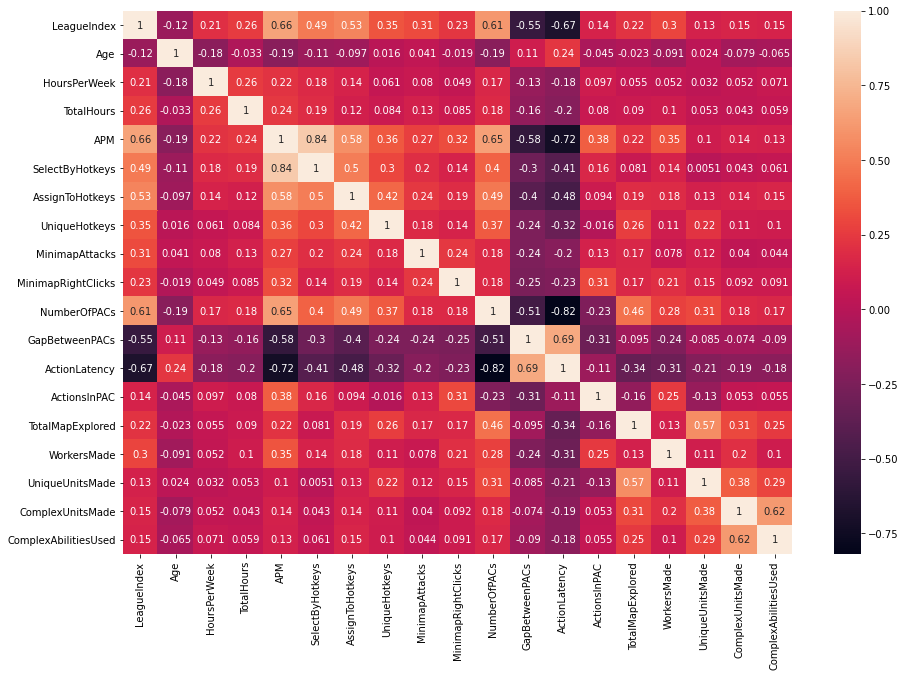

In [283]:
corrMatrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15,10))   
sn.heatmap(corrMatrix, annot=True) 
plt.show()

<div class="alert alert-block alert-info">
<b>Observations : </b> We can see that LeagueIndex is the most corrolated with <strong>ActionLatency (- 0.66), APM (0,62), NumberOfPACs (0.59), GapBetweenPACs (-0.54).</strong>
</div>

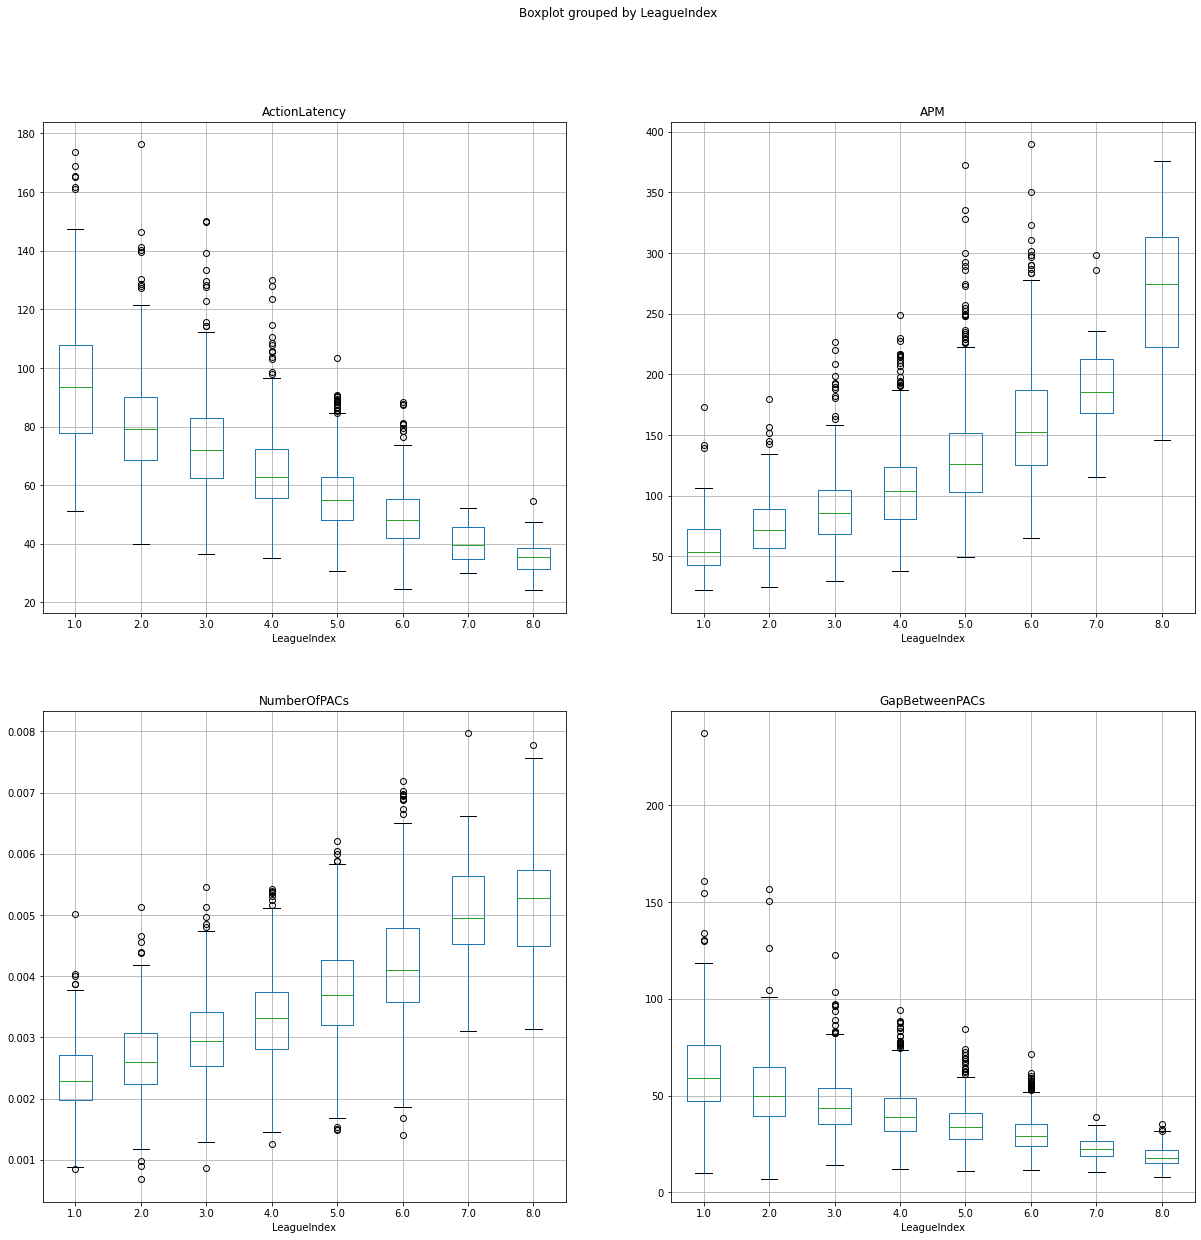

In [284]:
fig, axs = plt.subplots(2, 2,figsize=(20,20))

dataset.boxplot(column=['ActionLatency'],by="LeagueIndex",figsize=(9,5),ax=axs[0,0])
dataset.boxplot(column=['APM'],by="LeagueIndex",figsize=(9,5),ax=axs[0,1])
dataset.boxplot(column=['NumberOfPACs'],by="LeagueIndex",figsize=(9,5),ax=axs[1,0])
dataset.boxplot(column=['GapBetweenPACs'],by="LeagueIndex",figsize=(9,5),ax=axs[1,1])



plt.show()

<div class="alert alert-block alert-info">
<b>Observations : </b> We can see with these boxplot that <strong>ActionLatency seems to be the best indicator as the corrplot indicated,</strong> but it is not perfect as the range of values are quite large.
</div>

<div class="alert alert-block alert-warning">
Maybe with two parameters we could see clearer clusters.
</div>

<AxesSubplot:xlabel='ActionLatency', ylabel='AssignToHotkeys'>

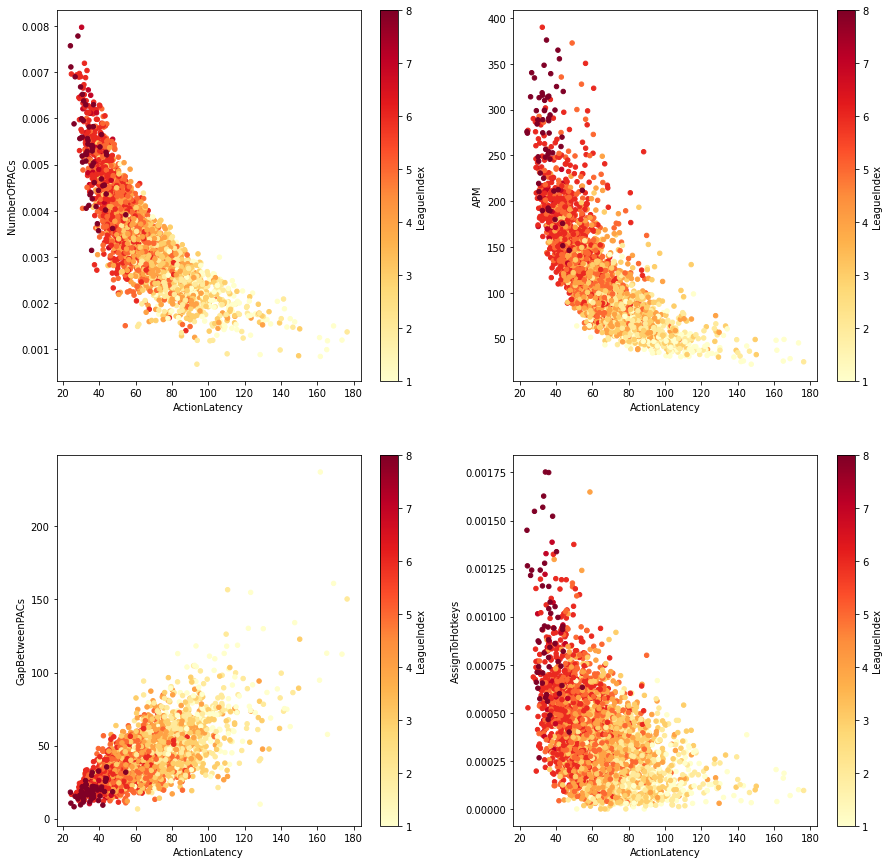

In [285]:
fig, axs = plt.subplots(2, 2,figsize=(15,15))
dataset.plot('ActionLatency','NumberOfPACs',kind="scatter",c='LeagueIndex',ax=axs[0,0],cmap='YlOrRd')
dataset.plot('ActionLatency','APM',kind="scatter",c='LeagueIndex',ax=axs[0,1],cmap='YlOrRd')
dataset.plot('ActionLatency','GapBetweenPACs',kind="scatter",c='LeagueIndex',ax=axs[1,0],cmap='YlOrRd')
dataset.plot('ActionLatency','AssignToHotkeys',kind="scatter",c='LeagueIndex',ax=axs[1,1],cmap='YlOrRd')

<div class="alert alert-block alert-info">
<b>Observations : </b> We can see with these plots that <strong>Action Latency seems to be a good classifier </strong> with the 4 others features that are also well correlated with League Index. Indeed, bigger is the Action latency bigger is the league index. But as we can see, there aren't clear clusters that would allow us to create a great model with those features. We can already say that we surely should ask for more informations about the players (life habits ? Player's Jobs? ... ).
</div>

### Data Engineering

<div class="alert alert-block alert-warning">
    Can we <strong>create new columns that would be more relevent to the league index ?</strong>
    <p>The only thing we could do is to see if some features are more relevent when passed <strong>under a logarithmic function</strong>. Let's see.</p>
</div>

In [317]:
columns_to_log = []
for col_name in dataset.drop(['LeagueIndex'], axis=1).columns:
    normal = dataset['LeagueIndex'].corr(dataset[col_name])
    logged = dataset['LeagueIndex'].corr(np.log(dataset[col_name]))
    if(abs(logged)>abs(normal)):
        columns_to_log.append(col_name)
    print(col_name, ":\n normal correlation =  ", normal,
          "\n log correlation = ",logged,"\n")

columns_to_log
    

Age :
 normal correlation =   -0.12041658136640214 
 log correlation =  -0.09866399505513092 

HoursPerWeek :
 normal correlation =   0.2066342452168561 
 log correlation =  nan 

TotalHours :
 normal correlation =   0.25602246896076897 
 log correlation =  0.489370357567988 

APM :
 normal correlation =   0.6626543103333653 
 log correlation =  0.6916251765475502 

SelectByHotkeys :
 normal correlation =   0.4906687271572481 
 log correlation =  nan 

AssignToHotkeys :
 normal correlation =   0.5308713957981165 
 log correlation =  nan 

UniqueHotkeys :
 normal correlation =   0.35071596310161585 
 log correlation =  nan 

MinimapAttacks :
 normal correlation =   0.31252552388558974 
 log correlation =  nan 

MinimapRightClicks :
 normal correlation =   0.2334150268292373 
 log correlation =  nan 

NumberOfPACs :
 normal correlation =   0.6119985119166921 
 log correlation =  0.6084750962691974 

GapBetweenPACs :
 normal correlation =   -0.5530710148109355 
 log correlation =  -0.5708

['TotalHours',
 'APM',
 'GapBetweenPACs',
 'ActionLatency',
 'ActionsInPAC',
 'TotalMapExplored',
 'WorkersMade']

<div class="alert alert-block alert-info">
<b>Observations : </b> We can see that some features are more relevent when passed threw log, like 'Age', 'APM', 'ActionsInPAC', 'TotalMapExplored' and 'WorkersMade'.
    <p>We are going to change our dataset in order to prefer those log(features) that we chose </p>
</div>

In [417]:
columns_to_log=['ActionLatency','TotalHours']

In [418]:
dataset_prep = copy.deepcopy(dataset)
for col in columns_to_log:
    dataset_prep['log('+col+')'] = np.log(dataset[col])
    #dataset_prep = dataset_prep.drop(col,axis = 1)
dataset_prep

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,...,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,log(ActionLatency),log(TotalHours)
0,5.0,27.000000,10.000000,3000.000000,143.7180,0.003515,0.000220,7.0,0.000110,0.000392,...,32.6677,40.8673,4.7508,28.0,0.001397,6.0,0.000000,0.000000,3.710330,8.006368
1,5.0,23.000000,10.000000,5000.000000,129.2322,0.003304,0.000259,4.0,0.000294,0.000432,...,32.9194,42.3454,4.8434,22.0,0.001194,5.0,0.000000,0.000208,3.745860,8.517193
2,4.0,30.000000,10.000000,200.000000,69.9612,0.001101,0.000336,4.0,0.000294,0.000461,...,44.6475,75.3548,4.0430,22.0,0.000745,6.0,0.000000,0.000189,4.322208,5.298317
3,3.0,19.000000,20.000000,400.000000,107.6016,0.001034,0.000213,1.0,0.000053,0.000543,...,29.2203,53.7352,4.9155,19.0,0.000426,7.0,0.000000,0.000384,3.984068,5.991465
4,3.0,32.000000,10.000000,500.000000,122.8908,0.001136,0.000327,2.0,0.000000,0.001329,...,22.6885,62.0813,9.3740,15.0,0.001174,4.0,0.000000,0.000019,4.128445,6.214608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,8.0,21.650689,15.862751,660.859712,259.6296,0.020425,0.000743,9.0,0.000621,0.000146,...,18.6059,42.8342,6.2754,46.0,0.000877,5.0,0.000000,0.000000,3.757337,6.493542
3389,8.0,21.650689,15.862751,660.859712,314.6700,0.028043,0.001157,10.0,0.000246,0.001083,...,14.3023,36.1156,7.1965,16.0,0.000788,4.0,0.000000,0.000000,3.586725,6.493542
3390,8.0,21.650689,15.862751,660.859712,299.4282,0.028341,0.000860,7.0,0.000338,0.000169,...,12.4028,39.5156,6.3979,19.0,0.001260,4.0,0.000000,0.000000,3.676696,6.493542
3391,8.0,21.650689,15.862751,660.859712,375.8664,0.036436,0.000594,5.0,0.000204,0.000780,...,11.6910,34.8547,7.9615,15.0,0.000613,6.0,0.000000,0.000631,3.551188,6.493542


In [410]:
corrMatrix = dataset_prep.corr()
corrMatrix['LeagueIndex'].sort_values()

log(ActionLatency)     -0.694786
ActionLatency          -0.673797
GapBetweenPACs         -0.553071
Age                    -0.120417
UniqueUnitsMade         0.132999
ActionsInPAC            0.143141
ComplexAbilitiesUsed    0.145422
ComplexUnitsMade        0.148266
HoursPerWeek            0.206634
TotalMapExplored        0.219878
MinimapRightClicks      0.233415
TotalHours              0.256022
WorkersMade             0.295644
MinimapAttacks          0.312526
UniqueHotkeys           0.350716
SelectByHotkeys         0.490669
AssignToHotkeys         0.530871
NumberOfPACs            0.611999
APM                     0.662654
LeagueIndex             1.000000
Name: LeagueIndex, dtype: float64

# Modeling

<div class="alert alert-block alert-warning">
We first establish a train and a test set.
</div>

In [419]:
labels = np.array(dataset_prep['LeagueIndex'])
features=dataset_prep.drop(columns=['LeagueIndex'])
features=np.array(features)

In [420]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 42)

### Normalize the data 

In [421]:
scl = sk.preprocessing.StandardScaler()

train_features_scaled = scl.fit_transform(train_features)
test_features_scaled = scl.transform(test_features)

### Logistic regression

In [422]:
logistic_clf = sk.linear_model.LogisticRegression(random_state=100, max_iter=1000, fit_intercept=True)
logistic_clf.fit(train_features_scaled, train_labels)

LogisticRegression(max_iter=1000, random_state=100)

In [423]:
pred_labels=logistic_clf.predict(test_features_scaled)

In [424]:
print("Accuracy:",metrics.accuracy_score(test_labels, pred_labels))

Accuracy: 0.4449901768172888


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

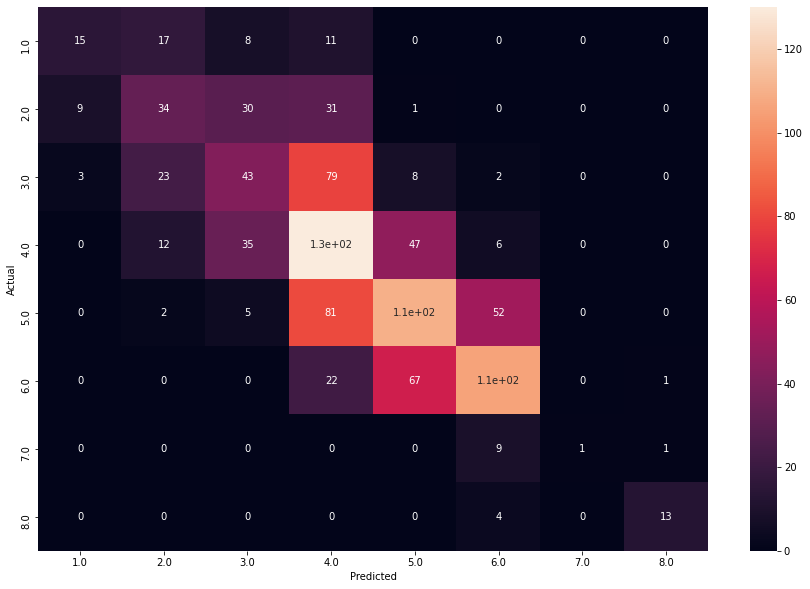

In [328]:
confusion_matrix = pd.crosstab(test_labels, pred_labels, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(15,10)) 
sn.heatmap(confusion_matrix, annot=True)

<div class="alert alert-block alert-info">
    <b>Observations : </b> The <strong>Accuracy is OK (better than random) (0.4449) ! </strong> We can see that it has mainly a big difficulty predicting leagues Index 7,3,2 and 1...
    Maybe we can do better ? 
</div>

### Random Forest

In [425]:
randForest_clf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
randForest_clf.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [426]:
pred_labels=randForest_clf.predict(test_features)

In [427]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, pred_labels))

Accuracy: 0.43418467583497056


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

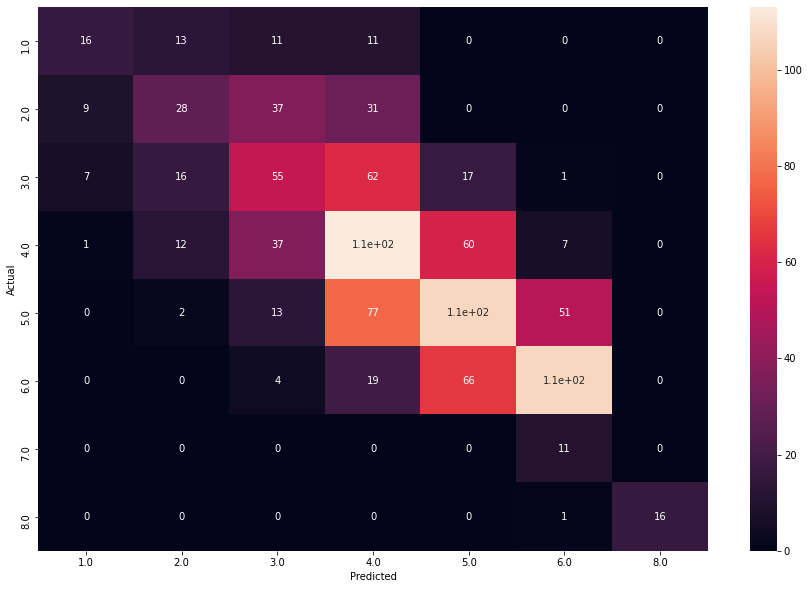

In [428]:
confusion_matrix = pd.crosstab(test_labels, pred_labels, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(15,10)) 
sn.heatmap(confusion_matrix, annot=True)

<div class="alert alert-block alert-info">
    <b>Observations : </b> The <strong>Accuracy is lower ...(0.4342), we can see that it has predicted 0 league 7... 
</div>

### Linear Discriminant Analysis (LDA)

In [429]:
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(train_features_scaled, train_labels)

LinearDiscriminantAnalysis()

In [430]:
pred_labels=lda_clf.predict(test_features_scaled)
print("Accuracy:",metrics.accuracy_score(test_labels, pred_labels))

Accuracy: 0.4155206286836935


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

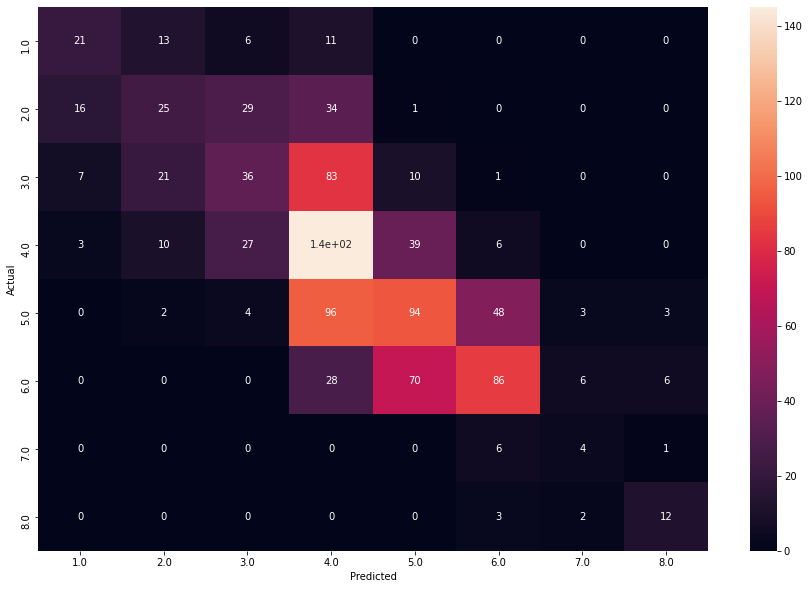

In [431]:
confusion_matrix = pd.crosstab(test_labels, pred_labels, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(15,10)) 
sn.heatmap(confusion_matrix, annot=True)

<div class="alert alert-block alert-info">
    <b>Observations : </b>The Accuracy is 0.4155 ...
</div>

### Neural network model 

In [432]:
train_features.shape

(2375, 20)

Minimum Validation Loss: 0.7716


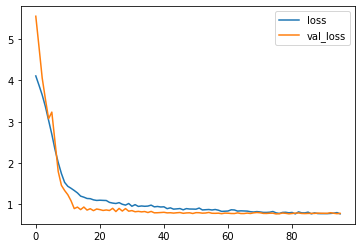

In [433]:
input_shape = [15]
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])


model.compile(
    optimizer='adam',
    loss='mae',
    #metrics=['mae'],
)

early_stopping = EarlyStopping(
 min_delta=0.001, patience=20,
 restore_best_weights=True,)

 
EPOCHS = 100
history = model.fit(
    train_features, train_labels,
    validation_data=(test_features, test_labels),
    batch_size=256,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [435]:
import math
pred_labels=model.predict(test_features)
pred_labels = np.round(pred_labels)
print("Accuracy:",metrics.accuracy_score(test_labels, pred_labels))


Accuracy: 0.3919449901768173


# We save our models


In [436]:
filename = "lda_model_LeagueIndex.pickle"
with open(filename, 'wb') as file:
    pickle.dump(lda_clf, file)

filename = "Rforest_model_LeagueIndex.pickle"
with open(filename, 'wb') as file:
    pickle.dump(randForest_clf, file)

filename = "lr_model_LeagueIndex.pickle"
with open(filename, 'wb') as file:
    pickle.dump(logistic_clf, file)


<div class="alert alert-block alert-warning">
    <p>Let's check that when importing those model we still have a good score.</p>
    <p> <strong> Carefull, while lda and lr needs scaled features, Random forest needs normal ones </strong></p>

</div>

In [439]:
#labels1 = np.array(dataset_prep['LeagueIndex'])
#features1=dataset_prep.drop(columns=['LeagueIndex'])

filename = "Rforest_model_LeagueIndex.pickle"
with open(filename, 'rb') as file:
    pickle_model = pickle.load(file)
#Carefull for the random forest, the features needs to be not scaled.
score = pickle_model.score(test_features, test_labels)
print("Random Forest model's test score: {0:.2f} %".format(100 * score))

Random Forest model's test score: 43.42 %


In [440]:
# We check that the models we saved still works when downloaded
filename = "lda_model_LeagueIndex.pickle"
with open(filename, 'rb') as file:
    pickle_model = pickle.load(file)

score = pickle_model.score(test_features_scaled, test_labels)
print("LDA model's test score: {0:.2f} %".format(100 * score))

filename = "Rforest_model_LeagueIndex.pickle"
with open(filename, 'rb') as file:
    pickle_model = pickle.load(file)
#Carefull for the random forest, the features needs to be not scaled.
score = pickle_model.score(test_features, test_labels)
print("Random Forest model's test score: {0:.2f} %".format(100 * score))

filename = "lr_model_LeagueIndex.pickle"
with open(filename, 'rb') as file:
    pickle_model = pickle.load(file)

score = pickle_model.score(test_features_scaled, test_labels)
print("Linear regression model's test score: {0:.2f} %".format(100 * score))
    

LDA model's test score: 41.55 %
Random Forest model's test score: 43.42 %
Linear regression model's test score: 44.50 %
